# PyCaret para Classificação

## Instalação e configuração da biblioteca

In [5]:
#!pip install --upgrade pycaret

In [45]:
import numpy as np
# Importar biblioteca PyCaret
from pycaret.classification import *

## Base de dados

In [46]:
from pycaret.datasets import get_data
todas_bases = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [47]:
dataset = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
type(dataset)

pandas.core.frame.DataFrame

In [49]:
dataset.shape

(150, 5)

In [51]:
dataset['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [52]:
np.unique(dataset['species'], return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50]))

In [53]:
base_treinamento = dataset.sample(frac=0.9, random_state=1)
base_treinamento.shape

(135, 5)

In [54]:
base_treinamento.index

Index([ 14,  98,  75,  16, 131,  56, 141,  44,  29, 120,
       ...
        81,  60,   0,   1,  57,  22,  61,  63,   7,  86],
      dtype='int64', length=135)

In [55]:
base_teste = dataset.drop(base_treinamento.index)
base_teste.shape

(15, 5)

In [56]:
base_teste.index

Index([20, 25, 37, 50, 68, 71, 72, 79, 96, 101, 129, 133, 134, 137, 140], dtype='int64')

## Configuração do ambiente PyCaret

In [57]:
from pycaret.classification import setup
experimento = setup(data = base_treinamento, target = 'species', session_id=1)

,Description,Value
0,Session id,1
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(135, 5)"
5,Transformed data shape,"(135, 5)"
6,Transformed train set shape,"(94, 5)"
7,Transformed test set shape,"(41, 5)"
8,Numeric features,4
9,Preprocess,True


## Treinamento de vários modelos com validação cruzada

- Validação cruzada: https://www.youtube.com/watch?v=RczbeFs_WbQ

In [58]:
from pycaret.classification import compare_models
modelos = compare_models(sort = 'Accuracy', fold = 10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9778,0.0000,0.9778,0.9833,0.9771,0.9667,0.9698,0.0540
lda,Linear Discriminant Analysis,0.9778,0.0000,0.9778,0.9833,0.9771,0.9667,0.9698,0.0320
nb,Naive Bayes,0.9689,0.9938,0.9689,0.9762,0.9678,0.9528,0.9571,0.0360
dt,Decision Tree Classifier,0.9689,0.9762,0.9689,0.9762,0.9678,0.9528,0.9571,0.0400
et,Extra Trees Classifier,0.9689,0.9981,0.9689,0.9762,0.9678,0.9528,0.9571,0.1590
xgboost,Extreme Gradient Boosting,0.9689,0.9663,0.9689,0.9762,0.9678,0.9528,0.9571,0.0650
rf,Random Forest Classifier,0.9578,0.9934,0.9578,0.9678,0.9564,0.9361,0.9420,0.1970
gbc,Gradient Boosting Classifier,0.9578,0.0000,0.9578,0.9678,0.9564,0.9361,0.9420,0.3730
knn,K Neighbors Classifier,0.9567,0.9917,0.9567,0.9670,0.9553,0.9346,0.9407,0.0540
lr,Logistic Regression,0.9467,0.0000,0.9467,0.9595,0.9450,0.9195,0.9269,0.6640


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Tuning dos modelos

In [59]:
from pycaret.classification import create_model
random_forest = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,1.0000,0.9000,0.9200,0.8956,0.8462,0.8598
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9000,0.9714,0.9000,0.9250,0.8971,0.8485,0.8616
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8889,0.9630,0.8889,0.9167,0.8857,0.8333,0.8492
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [60]:
print(random_forest)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [61]:
from pycaret.classification import tune_model
random_forest_tuning = tune_model(random_forest)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,1.0000,0.9000,0.9200,0.8956,0.8462,0.8598
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9000,0.9571,0.9000,0.9250,0.8971,0.8485,0.8616
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8889,0.9444,0.8889,0.9167,0.8857,0.8333,0.8492
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [62]:
print(random_forest_tuning)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=2, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.2, min_samples_leaf=5,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=60, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [63]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,1.0000,0.9000,0.9200,0.8956,0.8462,0.8598
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
5,0.8889,0.9167,0.8889,0.9167,0.8857,0.8333,0.8492
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [64]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [65]:
np.arange(1,51,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [66]:
knn_tuning = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(1,51,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9167,0.9000,0.9200,0.8956,0.8462,0.8598
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8889,0.9167,0.8889,0.9167,0.8857,0.8333,0.8492
5,0.8889,0.9167,0.8889,0.9167,0.8857,0.8333,0.8492
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [67]:
print(knn_tuning)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')


## Gráficos

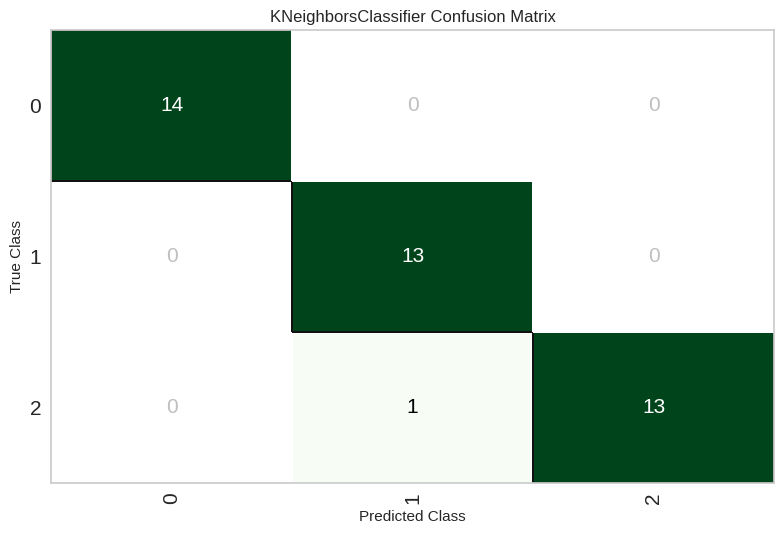

In [68]:
from pycaret.classification import plot_model
plot_model(knn_tuning, plot = 'confusion_matrix')

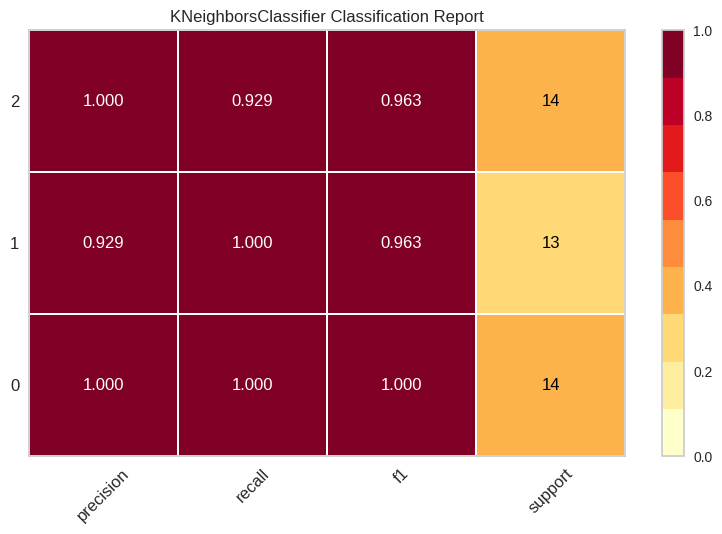

In [69]:
# https://www.youtube.com/watch?v=fC_C695yVOk
plot_model(knn_tuning, plot = 'class_report')

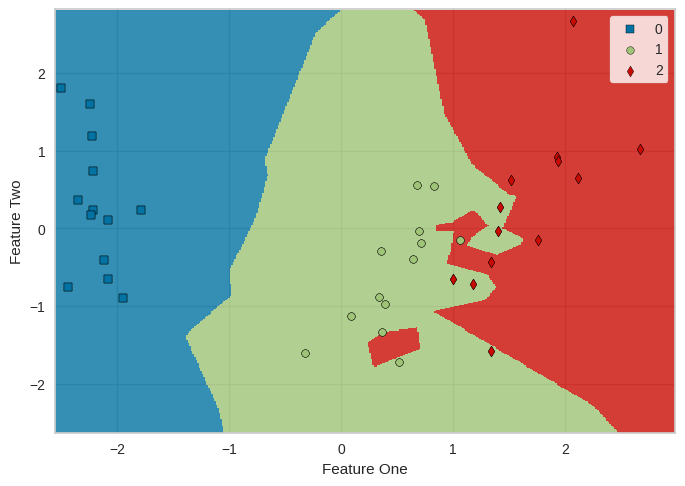

In [70]:
plot_model(knn_tuning, plot='boundary')

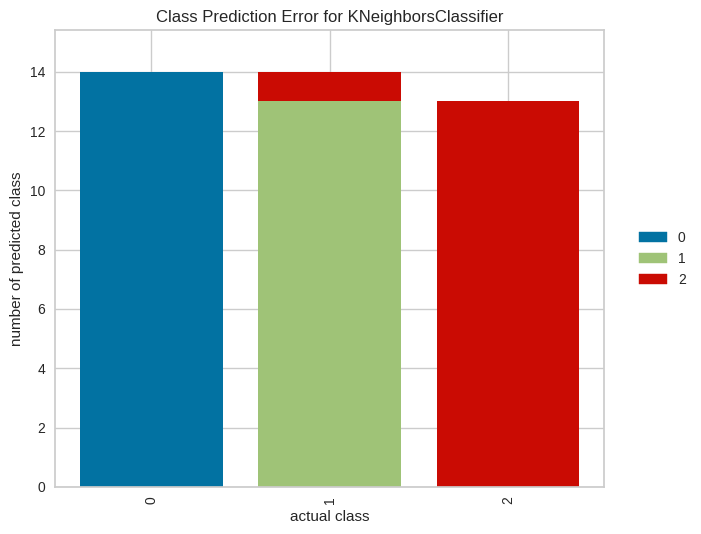

In [71]:
plot_model(knn_tuning, plot = 'error')

In [72]:
from pycaret.classification import evaluate_model
evaluate_model(knn_tuning)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Previsões com o modelo

In [73]:
from pycaret.classification import predict_model
predict_model(knn_tuning);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9756,0.9821,0.9756,0.9774,0.9756,0.9634,0.9643


In [74]:
from pycaret.classification import finalize_model
knn_final = finalize_model(knn_tuning)
print(knn_final)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sepal_length', 'sepal_width',
                                             'petal_length', 'petal_width'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empt...
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
     

In [75]:
from pycaret.classification import save_model
save_model(knn_final,'knn')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empt...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               c

In [76]:
from pycaret.classification import load_model
knn_carregado = load_model('/content/knn')

Transformation Pipeline and Model Successfully Loaded


In [77]:
previsoes = predict_model(knn_carregado, data=base_teste)
previsoes

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8667,0.8889,0.8667,0.8667,0.8667,0.7917,0.7917


,sepal_length,sepal_width,petal_length,petal_width,species,prediction_label,prediction_score
20,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa,1.0
25,5.0,3.0,1.6,0.2,Iris-setosa,Iris-setosa,1.0
37,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,1.0
50,7.0,3.2,4.7,1.4,Iris-versicolor,Iris-versicolor,1.0
68,6.2,2.2,4.5,1.5,Iris-versicolor,Iris-versicolor,1.0
71,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor,1.0
72,6.3,2.5,4.9,1.5,Iris-versicolor,Iris-virginica,1.0
79,5.7,2.6,3.5,1.0,Iris-versicolor,Iris-versicolor,1.0
96,5.7,2.9,4.2,1.3,Iris-versicolor,Iris-versicolor,1.0
101,5.8,2.7,5.1,1.9,Iris-virginica,Iris-virginica,1.0
